In [1]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
df = pd.read_csv("bestsellers with categories.csv")

In [3]:
#Renaming 
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
#Determining the total length of letters present in Name of books
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" "))
df

,Name,Author,User_Rating,Reviews,Price,Year,Genre,name_len
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59
...,...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction,36
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction,71
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction,71
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction,71


In [5]:
#clean data without any duplicates
clean = df.drop_duplicates('Name')
#Genre count
gcount = clean['Genre'].value_counts()

In [6]:
gcount

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

C:\Users\Vaibhav Bhardwaj\AppData\Local\Temp\ipykernel_12692\1402377802.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


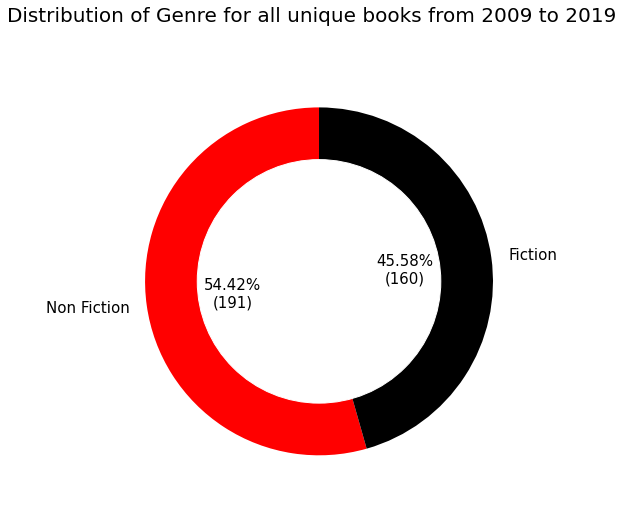

In [7]:
#Plotting pie chart for genre count
fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=gcount.values,labels=gcount.index,autopct=make_autopct(gcount.values),pctdistance=0.5,startangle=90,textprops={'size': 15},colors=['red','black'])

ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

C:\Users\Vaibhav Bhardwaj\AppData\Local\Temp\ipykernel_12692\4047149469.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


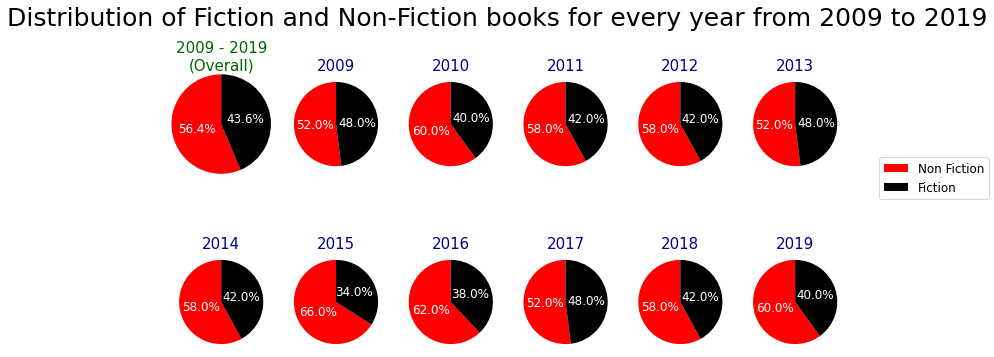

In [8]:
#Plotting Year-Wise Pie Chart
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
gcount = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=gcount.values, labels=None, autopct='%1.1f%%',startangle=90, textprops={'size': 12, 'color': 'white'},pctdistance=0.5, radius=1.3, colors=['red','black'])
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkblue', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=['red','black'], radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=['red','black'], radius=1.1)
    ax[1,i].set_title(year, color='darkblue', fontdict={'fontsize': 15})

plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             fontsize=25)
fig.legend(gcount.index, loc='center right', fontsize=12)
fig.show()

In [9]:
#Best Non-Fiction Authors
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_nf_authors

Author
Gary Chapman                          11.0
American Psychological Association    10.0
Gallup                                 9.0
Rob Elliott                            8.0
Stephen R. Covey                       7.0
Bill O'Reilly                          7.0
Don Miguel Ruiz                        6.0
Sarah Young                            6.0
The College Board                      6.0
Roger Priddy                           5.0
Dale Carnegie                          5.0
Name: (Name, Non Fiction), dtype: float64

In [10]:
#Best Fiction Authors
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]
best_f_authors

Author
Jeff Kinney        12.0
Suzanne Collins    11.0
Rick Riordan       11.0
Dr. Seuss           9.0
Stephenie Meyer     7.0
Dav Pilkey          7.0
Eric Carle          7.0
J.K. Rowling        6.0
E L James           6.0
Stieg Larsson       6.0
Harper Lee          6.0
Name: (Name, Fiction), dtype: float64

C:\Users\Vaibhav Bhardwaj\AppData\Local\Temp\ipykernel_12692\3188677331.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
C:\Users\Vaibhav Bhardwaj\AppData\Local\Temp\ipykernel_12692\3188677331.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


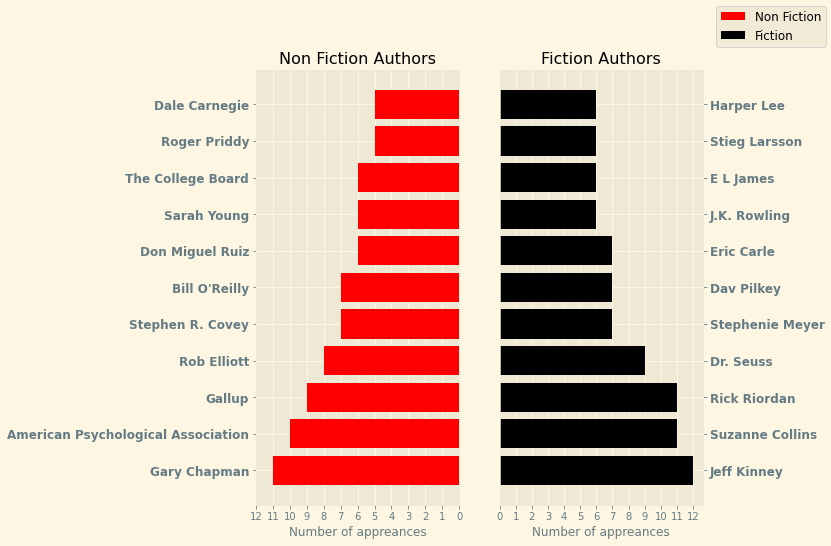

In [11]:
#PLoting Best Selling Authors
genre_col = ['red','black']
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

C:\Users\Vaibhav Bhardwaj\AppData\Local\Temp\ipykernel_12692\2909705594.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


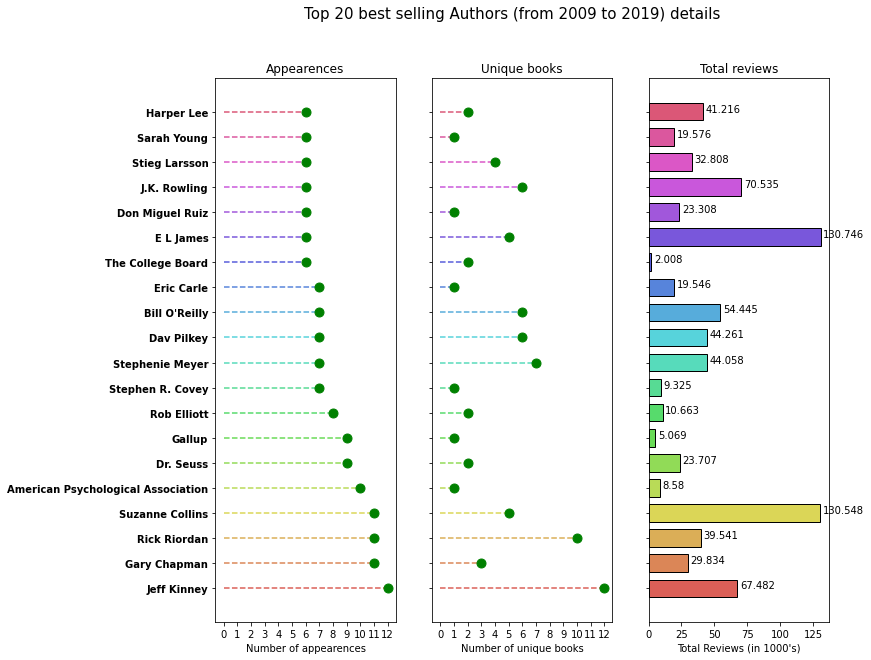

<Figure size 432x288 with 0 Axes>

In [15]:
#PLoting Best Selling Authors with details
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name')

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()
